# Bloque 1 - clasificando datos

Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este enlace.

**1** - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con ``pandas``.

**2** - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro ``stratify`` a partir de la variable objetivo para mantener la proporción de los datos.

**3** - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos [``DecisionTreeClassifier``](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) y [``RandomForestClassifier``](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro ``max_depth`` del algoritmo ``DecisionTreeClassifier`` y el valor 2 para el ``max_depth`` del algoritmo ``RandomForestClassifier``, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

**4** - La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método ``predict`` para generar las predicciones de los valores y comparar con los valores reales de la base de datos.



## Tarea 1

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('diabetes.csv')

In [27]:
df.head()

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   glicemia                  394 non-null    int64  
 1   presion_sanguinea         394 non-null    int64  
 2   grasa_subcutanea_triceps  394 non-null    int64  
 3   insulina                  394 non-null    float64
 4   imc                       394 non-null    float64
 5   diabetes                  394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


In [29]:
X = df.drop(columns='diabetes',axis=1)
y = df.diabetes

In [30]:
X.head()

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc
0,66,23,94,28.1,0.167
1,40,35,168,43.1,2.288
2,50,32,88,31.0,0.248
3,70,45,543,30.5,0.158
4,60,23,846,30.1,0.398


In [31]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: diabetes, dtype: int64

## Tarea 2

In [32]:
from sklearn.model_selection import train_test_split

In [ ]:
# esto es para saber cuan desproporcionado estan los numeros
y.value_counts().sort_index()

diabetes
0    264
1    130
Name: count, dtype: int64

In [35]:
X,X_test,y,y_test = train_test_split(X,y,test_size=0.05,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

## Tarea 3

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
modeloTree = DecisionTreeClassifier(max_depth=3)
modeloRandomForest = RandomForestClassifier(max_depth=2)

modeloTree.fit(X,y)
modeloRandomForest.fit(X,y)

print('Modelo Tree')
print(f'La exactitud del modelo en entrenamiento es: {modeloTree.score(X_train,y_train)}')
print(f'La exactitud del modelo en validacion es: {modeloTree.score(X_val,y_val)}\n\n')
print('Modelo Random Forest')
print(f'La exactitud del modelo en entrenamiento es: {modeloRandomForest.score(X_train,y_train)}')
print(f'La exactitud del modelo en validacion es: {modeloRandomForest.score(X_val,y_val)}')

Modelo Tree
La exactitud del modelo en entrenamiento es: 0.725
La exactitud del modelo en validacion es: 0.8191489361702128


Modelo Random Forest
La exactitud del modelo en entrenamiento es: 0.7214285714285714
La exactitud del modelo en validacion es: 0.7553191489361702


## Tarea 4

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
y_previstoTree = modeloTree.predict(X_val)
y_previstoRandomForest = modeloRandomForest.predict(X_val)

matriz_confusionTree = confusion_matrix(y_val,y_previstoTree)
matriz_confusionRandomForest = confusion_matrix(y_val,y_previstoRandomForest)

print('Tree')
print(f'{matriz_confusionTree}\n')
print(f'Random Forest')
print(matriz_confusionRandomForest)

Tree
[[60  3]
 [14 17]]

Random Forest
[[60  3]
 [20 11]]


In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

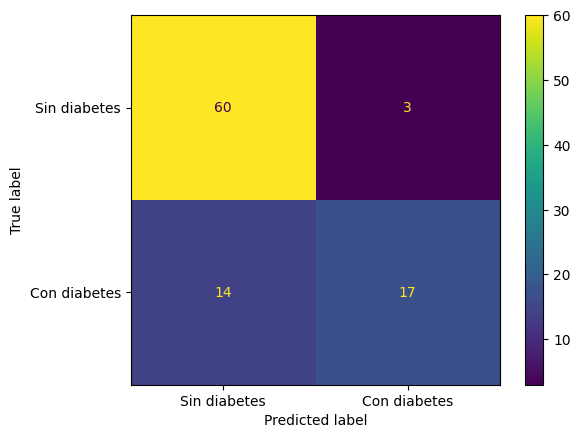

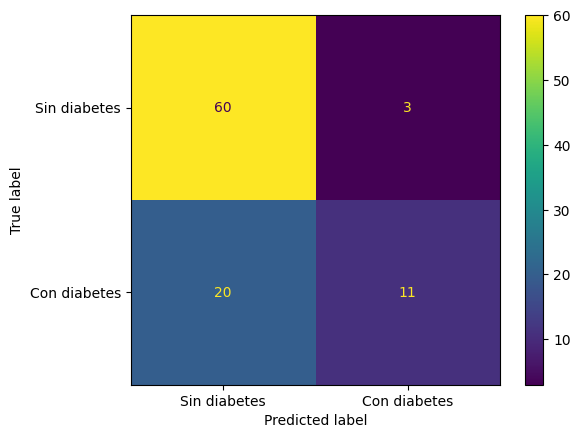

In [42]:
visualizacionTree = ConfusionMatrixDisplay(confusion_matrix=matriz_confusionTree,display_labels=['Sin diabetes', 'Con diabetes'])
visualizacionTree.plot();
visualizacionRandomForest = ConfusionMatrixDisplay(confusion_matrix=matriz_confusionRandomForest,display_labels=['Sin diabetes', 'Con diabetes'])
visualizacionRandomForest.plot();